In [3]:
from sklearn import datasets

In [4]:
# 데이터 불러오기
raw_face = datasets.fetch_lfw_people(min_faces_per_person=20,
                                     resize=0.5,
                                     color=False)

In [5]:
# 데이터 살펴보기
n_samples, h, w = raw_face.images.shape
print(n_samples)
print(h)
print(w)

X = raw_face.data
n, p = X.shape
print(n)
print(p)
y = raw_face.target
target_names = raw_face.target_names
k = target_names.shape[0]
print(k)

2211
62
47
2211
2914
34


In [6]:
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X,y,random_state=1)

In [12]:
# 비음수 행렬 분해
from sklearn.decomposition import NMF
nmf = NMF(n_components=10, random_state=0)
nmf.fit(X_tn)
X_tn_nmf = nmf.transform(X_tn)
X_te_nmf = nmf.transform(X_te)

c:\Users\jooon\anaconda3\Lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


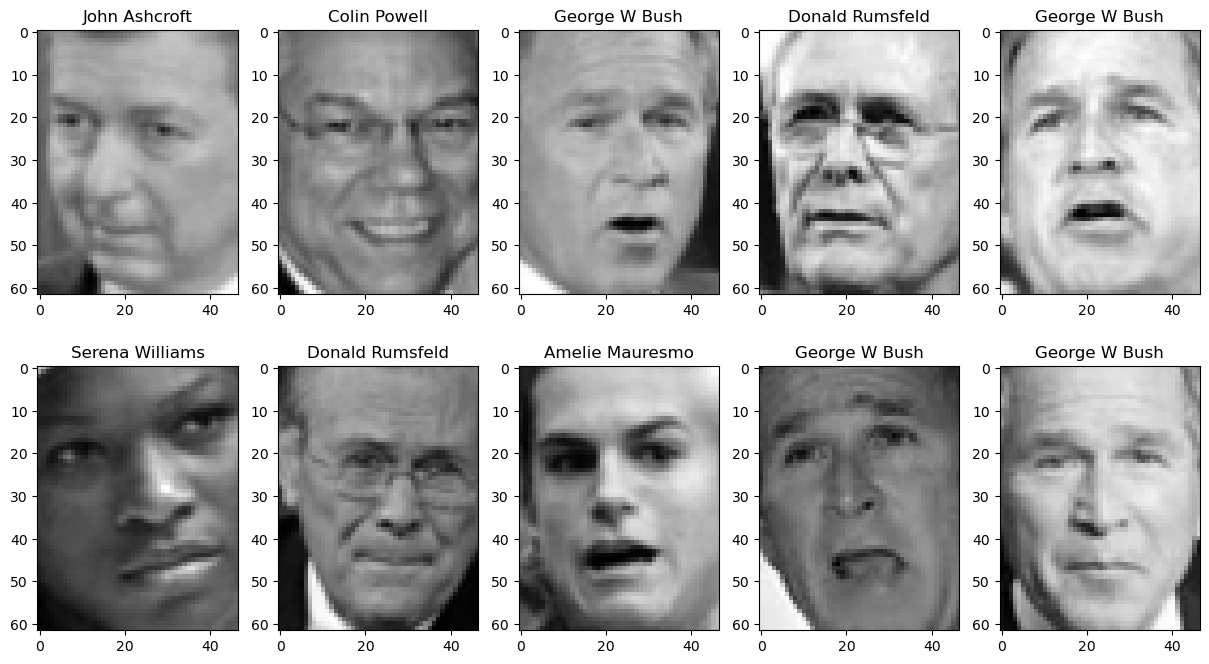

In [14]:
# 오리지널 데이터 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.gray()
for i in range(2*5):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_tn[i].reshape((h,w)))
    plt.title(target_names[y_tn[i]])
plt.show()

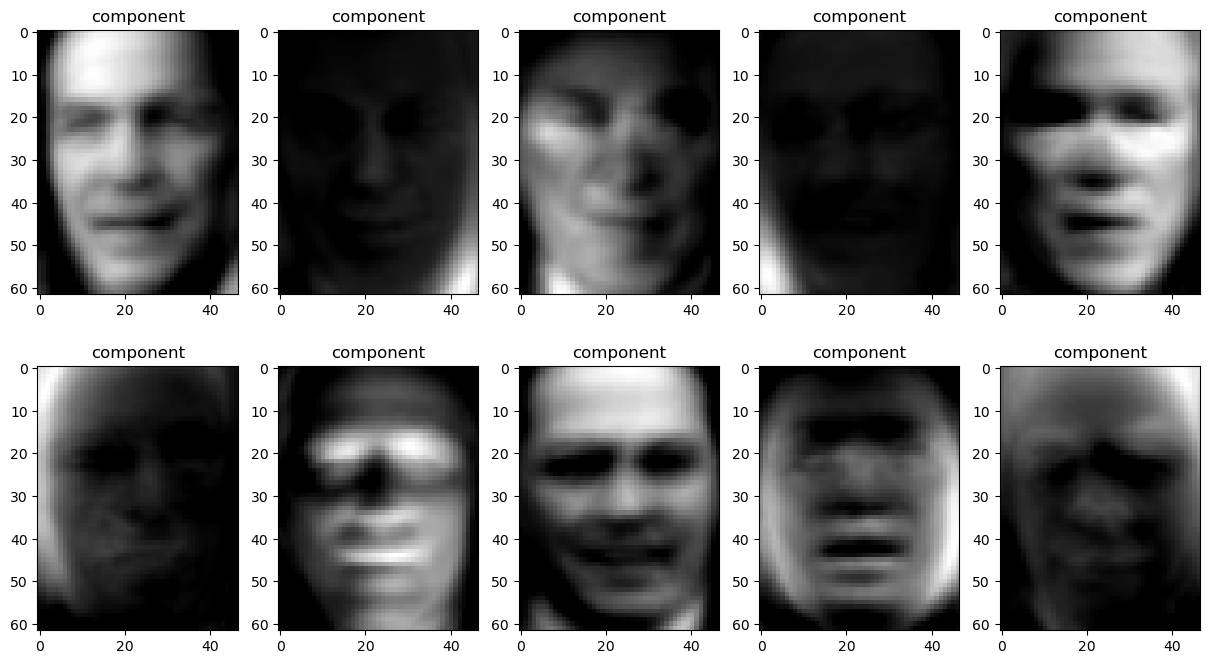

In [15]:
# 비음수 행렬 분해 요소 시각화
plt.figure(figsize=(15,8)) 
plt.gray()
for i in range(2*5):
    plt.subplot(2, 5, i+1)
    plt.imshow(nmf.components_[i].reshape((h,w)))
    plt.title("component".format(i))
plt.show()